In [11]:
import pandas as pd
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline
import matplotlib.pyplot as plt

In [12]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target)

In [13]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
#y

In [15]:
#Column Features explanation:
# CRIM per capita crime rate by town
# ZN proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS proportion of non-retail business acres per town
# CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# NOX nitric oxides concentration (parts per 10 million)
# RM average number of rooms per dwelling
# AGE proportion of owner-occupied units built prior to 1940
# DIS weighted distances to five Boston employment centres
# RAD index of accessibility to radial highways
# TAX full-value property-tax rate per $10,000
# PTRATIO pupil-teacher ratio by town
# B 1000(Bk — 0.63)² where Bk is the proportion of blacks by town
# LSTAT % lower status of the population
# MEDV Median value of owner-occupied homes in $1000’s

In [16]:
#Train and test data split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [17]:
# XGBoost model setting
regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

In [18]:
#Xgboots model train
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [19]:
regressor.feature_importances_

array([0.02329813, 0.00684736, 0.01682996, 0.01155563, 0.06226888,
       0.36315316, 0.0090434 , 0.02780096, 0.02039009, 0.03511851,
       0.14881527, 0.01253262, 0.26234597], dtype=float32)

In [20]:
pd.DataFrame(regressor.feature_importances_.reshape(1, -1), columns=boston.feature_names)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.023298,0.006847,0.01683,0.011556,0.062269,0.363153,0.009043,0.027801,0.02039,0.035119,0.148815,0.012533,0.262346


In [21]:
y_pred = regressor.predict(X_test)
y_trained = regressor.predict(X_train)

In [22]:
#Model assessment MSE and r2
MSE = mean_squared_error(y_test, y_pred)
r2 = regressor.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 15.385583008008313, R2: 0.8419923511822744


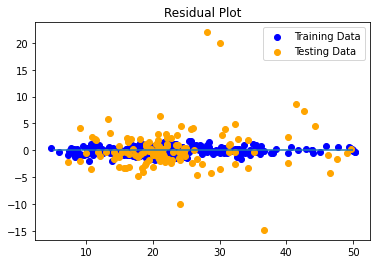

In [23]:
#Residue plot

plt.scatter(regressor.predict(X_train), y_train - y_trained, c="blue", label="Training Data")
plt.scatter(regressor.predict(X_test), y_test - y_pred, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()